In [697]:
import json
import pandas as pd
import matplotlib.pyplot as plt


def read_json_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            json_obj = json.loads(line)
            data.append(json_obj)
    return data

In [698]:
json_path = "/cluster/scratch/mullec/FoRL/FRL23-project/dreamerv3/logdir/cartpole_random_100000_0001_increasing_log_solved/metrics.jsonl"

metrics = read_json_file(json_path)

metrics_df = pd.json_normalize(metrics)

# # Print the DataFrame
# for col in metrics_df.columns:
#     print(col)

In [699]:
cost_per_observation = 0.4

metrics_df["eval/diff_reward_avg"] = metrics_df["eval/reward_avg"] - metrics_df["eval/reward_pred"]
metrics_df["eval/diff_reward_avg_abs"] = metrics_df["eval/diff_reward_avg"].abs()

metrics_df["episode/scaled_score"] = metrics_df["episode/score"] - metrics_df["episode/length"] * cost_per_observation

/tmp/ipykernel_26466/3588967461.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


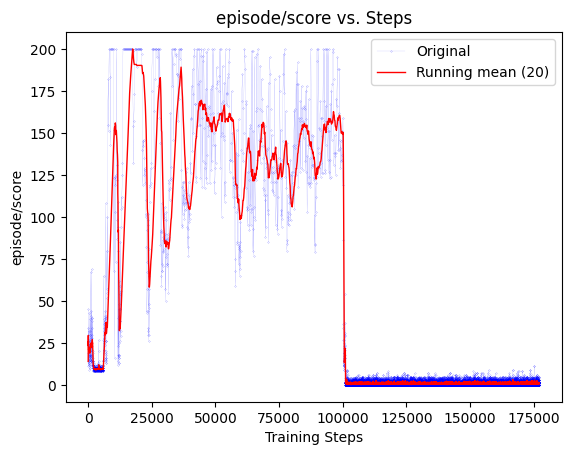

In [700]:
METRIC = "episode/score"
ROLLING_WINDOW = 20


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()


/tmp/ipykernel_26466/403949992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


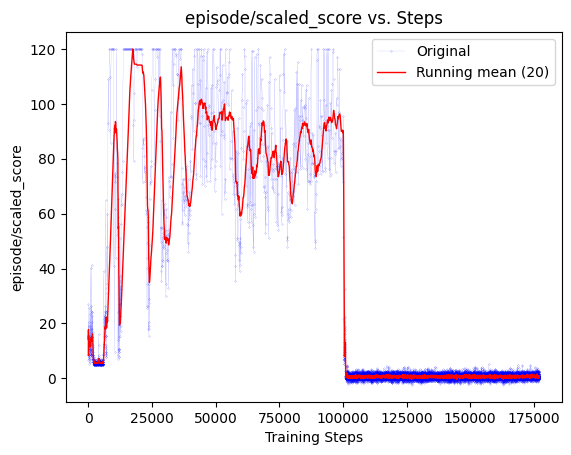

In [701]:
METRIC = "episode/scaled_score"
ROLLING_WINDOW = 20


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()

/tmp/ipykernel_26466/1179111738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


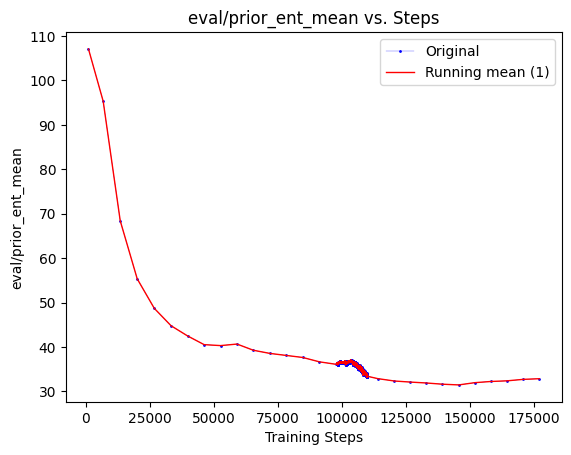

In [702]:
METRIC = "eval/prior_ent_mean"
ROLLING_WINDOW = 1


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=1)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()


/tmp/ipykernel_26466/4177050317.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


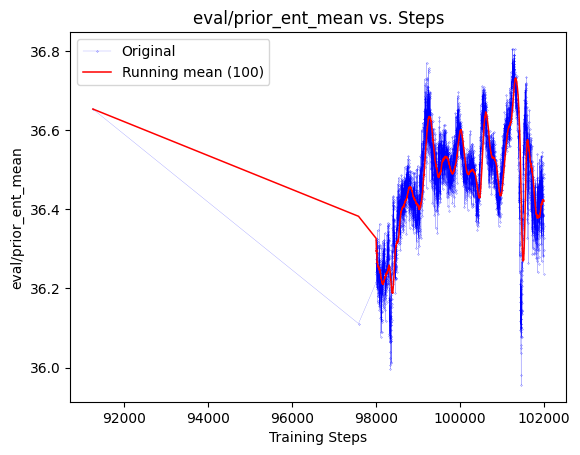

In [708]:
METRIC = "eval/prior_ent_mean"
FROM = 90000
UNTIL = 102000
ROLLING_WINDOW = 100

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for step > 1000
metrics_df_filtered = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_filtered['step'], metrics_df_filtered[METRIC], marker='o', linestyle='-', color='b', linewidth=0.1, markersize=0.2)
plt.plot(metrics_df_filtered['step'], metrics_df_filtered['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1.1, markersize=0.2)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()


# DRAFT : 
/

/

/

/

/

/

/

/

In [704]:
# episode_df = metrics_df[["episode/length", "episode/score", "episode/reward_rate"]]
# episode_df.loc[:, "episode/scaled_score"] = episode_df["episode/score"] - episode_df["episode/length"] * cost_per_observation
# episode_df['step'] = episode_df['episode/length'].cumsum().shift(fill_value=0)

In [705]:
# episode_df_no_na = episode_df.dropna(how='any', subset=['episode/scaled_score', 'step'])

# # Calculate the moving average using a window size of 10
# episode_df_no_na['smoothed_scaled_score'] = episode_df_no_na['episode/scaled_score'].rolling(window=20, min_periods=1).mean()

# # Plot the original data points and the smoothing line
# plt.plot(episode_df_no_na['step'], episode_df_no_na['episode/scaled_score'], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
# plt.plot(episode_df_no_na['step'], episode_df_no_na['smoothed_scaled_score'], linestyle='-', color='r', linewidth=1)
# plt.xlabel('Training Steps')
# plt.ylabel('Discounted Returns')
# plt.title('Discounted Returns vs. Steps')
# plt.legend(['Original', 'Smoothed'])
# plt.show()


In [706]:
# ROLLING_WINDOW = 20

# episode_df_no_na = episode_df.dropna(how='any', subset=['episode/score', 'step'])

# # Calculate the moving average using a window size of 10
# episode_df_no_na['smoothed_score'] = episode_df_no_na['episode/score'].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# # Plot the original data points and the smoothing line
# plt.plot(episode_df_no_na['step'], episode_df_no_na['episode/score'], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
# plt.plot(episode_df_no_na['step'], episode_df_no_na['smoothed_score'], linestyle='-', color='r', linewidth=1)
# plt.xlabel('Training Steps')
# plt.ylabel('Returns')
# plt.title('Returns vs. Steps')
# plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
# plt.show()